Лабораторная работа №0.

Киреев А.К., группа М8О-306Б-19

## ТЗ
В данной лабораторной работе, вы выступаете в роли предприимчивого начинающего стартапера в области машинного обучения. Вы заинтересовались этим направлением и хотите  предложить миру что-то новое и при этом неплохо заработать. От вас требуется определить задачу которую вы хотите решить  и найти под нее соответствующие данные. Так как вы не очень богаты, вам предстоит руками проанализировать данные, визуализировать зависимости, построить новые признаки и сказать хватит ли вам этих данных, и если не хватит найти еще. Вы готовитесь представить отчет ваши партнерам и спонсорам, от которых зависит дальнейшая ваша судьба. Поэтому тщательно работайте:) И главное, день промедления и вас опередит ваш конкурент, да и сплагиаченная работа отразится на репутации

## Выбор и загрузка датасета

Я решил взять какой-нибудь хороший и простой для понимания датасет с kaggle для задачи классификации. Мой выбор пал на датасет для сердечных заболеваний. (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) 

В данной задаче нужно будет предсказывать, есть ли у человека проблемы с сердцем (сердечная недостаточность) или нет, т.е. задача бинарной классификации.

Вот информация о признаках из данного датасета, взята из kaggle.

Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
data = pd.read_csv('gdrive/MyDrive/archive/heart.csv')

Посмотрим на данные.

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Числовые признаки
num_cols = [
    'Age',
    'RestingBP',
    'Cholesterol',
    'MaxHR',
    'Oldpeak'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'ChestPainType',
    'FastingBS',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope'
]

feature_cols = num_cols + cat_cols
target_col = 'HeartDisease'

Посчитаем количеcтво NaN'ов.

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Посмотрим на данные при помощи метода info.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Колонка FastingBS имеет тип int64, однако содержит только значения "0" и "1", так что ее можно отнести к категориальной, это следует также из описания колонки (**fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]**).

In [ ]:
data["FastingBS"].unique()

array([0, 1])

In [ ]:
data["FastingBS"] = data["FastingBS"].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


Посмотрим и на другие категориальные фичи, чтобы убедиться, что там нет невалидных значений.

In [ ]:
check = dict(zip(cat_cols, [data[cat_col].unique() for cat_col in cat_cols]))
for cat_col, uni in check.items():
    print(cat_col, uni, sep=' ')
    print()

Sex ['M' 'F']

ChestPainType ['ATA' 'NAP' 'ASY' 'TA']

FastingBS [0 1]

RestingECG ['Normal' 'ST' 'LVH']

ExerciseAngina ['N' 'Y']

ST_Slope ['Up' 'Flat' 'Down']



Теперь, кажется, все фичи распределены по численным и категориальным, невалидных данных нет и можно начать анализировать данные.

## Анализ данных

Оценим средние значения, стандартные отклонения и другие знаечния у числовых признаков.

In [ ]:
data[num_cols].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


Можно видеть, что каких-то сильных шумов в данных нет, разве что максимальное значение в колонке Cholesterol может говорить, о некоторых аномальных значениях в датасете.

In [ ]:
data[data["Cholesterol"] > (data["Cholesterol"].mean() - data["Cholesterol"].min()) * 2].shape[0] * 100 / data.shape[0]

1.4161220043572984

Как мы видим, очень больших значений (которые в 2 раза больше нормы) не больше 1.5%, так что датасет зашумлен не сильно. (я эти строки оставлю, так как у меня нет полной уверенности, что это именно шумы, а не валидные данные. я так вполне могу сделать, так как их немного и на общий результат они сильно не должны повлиять)

Рассмотрим распределения числовых признаков.

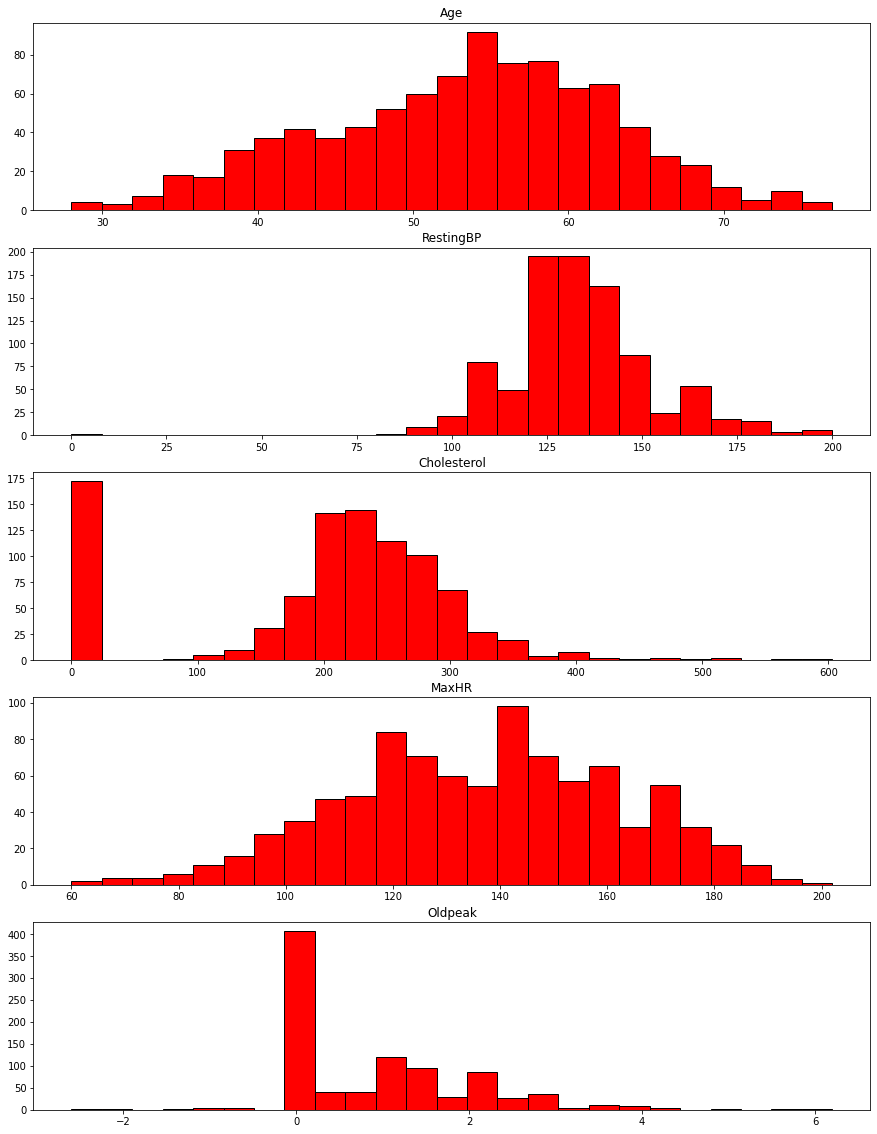

In [ ]:
fig, ax_hist = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(15, 20))

for i, num_col in enumerate(num_cols):
    sns.histplot(data[num_col],
                 bins=25,
                 alpha=1.0,
                 color='red',
                 edgecolor='black',
                 ax=ax_hist[i])
    ax_hist[i].set(xlabel='', ylabel='', title=f'{num_col}')

plt.show()

In [ ]:
data[num_cols].skew()

Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

In [ ]:
data[num_cols].mean()

Age             53.510893
RestingBP      132.396514
Cholesterol    198.799564
MaxHR          136.809368
Oldpeak          0.887364
dtype: float64

In [ ]:
data[num_cols].median()

Age             54.0
RestingBP      130.0
Cholesterol    223.0
MaxHR          138.0
Oldpeak          0.6
dtype: float64

Как можно видеть из графиков и из таблиц средних и медиан признаки Cholesterol и Oldpeak являются смещенными(skewed).

Теперь разделим датасет на две части: часть людей с заболеванием и часть людей без него.

In [ ]:
data0 = data[data[target_col] == 0]
data1 = data[data[target_col] == 1]

Построим графики распределения для различных числовых признаков и проанализируем их.

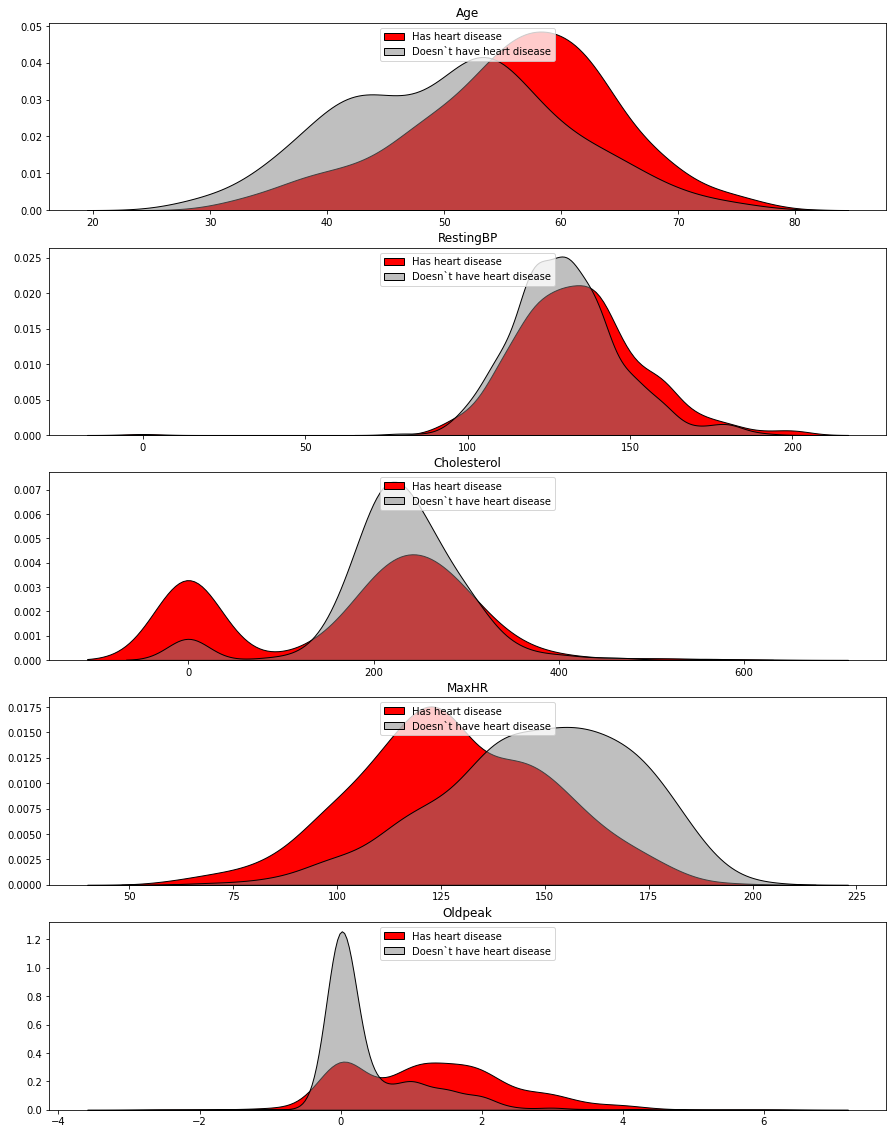

In [ ]:
fig, ax_hist = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(15, 20))

for i, num_col in enumerate(num_cols):
    sns.kdeplot(data1[num_col],
                alpha=1,
                label='Has heart disease',
                color='red',
                edgecolor='black',
                ax=ax_hist[i],
                shade=True)
    sns.kdeplot(data0[num_col],
                alpha=0.5,
                label='Doesn`t have heart disease',
                color='gray',
                edgecolor='black',
                ax=ax_hist[i],
                shade=True)
    ax_hist[i].set(xlabel='', ylabel='', title=f'{num_col}')
    ax_hist[i].legend(loc='upper center')

plt.show()

Можно видеть, что есть зависимость между Oldpeak и людьми, у которых нет сердечной болезни (у здоровых людей наблюдается Oldpeak == 0). Также можно видеть, что у больных люей MaxHR сдвинут вправо, по сравнению со здоровыми. 

Теперь оценим категориальные признаки.

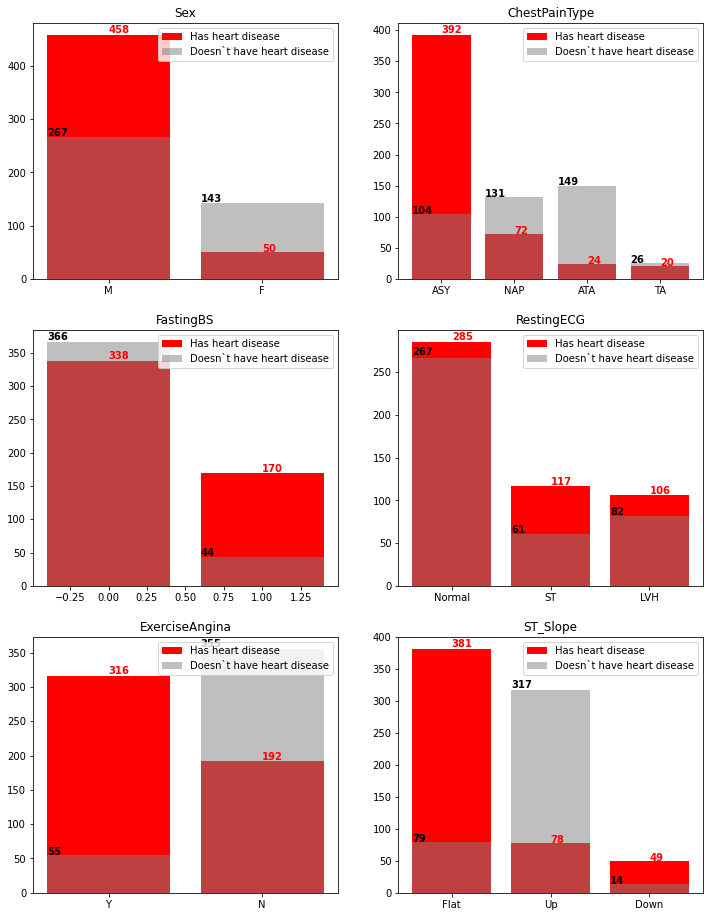

In [ ]:
# число диаграмм в ряду на холсте
hists_count_in_row = 2
fig, cat_ax = plt.subplots(nrows=int(np.ceil(len(cat_cols)/hists_count_in_row)), 
                           ncols=hists_count_in_row, 
                           figsize=(12, 16))
# превратим в одномерный список из гистограмм, чтобы было удобнее
cat_ax = cat_ax.ravel()

for i, ax in enumerate(cat_ax):
    if (i >= len(cat_cols)):  # если диаграммы кончились, то удалим ненужные диаграммы
        fig.delaxes(cat_ax[i]) 
    else:
        cat_col = cat_cols[i]
        count1 = data1[cat_col].value_counts()
        count0 = data0[cat_col].value_counts()

        bars1 = ax.bar(height=count1,
                       x=count1.index,
                       color='red',
                       label='Has heart disease')

        bars0 = ax.bar(height=count0,
                       x=count0.index,
                       color='gray',
                       alpha=0.5,
                       label='Doesn`t have heart disease')

        for bar in bars1:
            yval = bar.get_height()
            ax.text(bar.get_x() + 0.5 * bar.get_width(),
                    yval * 1.01,
                    yval,
                    color='red',
                    fontweight='bold')

        for bar in bars0:
            yval = bar.get_height()
            ax.text(bar.get_x(),
                    yval * 1.01,
                    yval,
                    color='black',
                    fontweight='bold')

        ax.set_title(cat_col)
        ax.legend(loc='upper right')

plt.show()

Из графиков можно видеть, что в данном датасете оказалось, что мужчины страдают сердечной недостаточностью чаще женщин (у мужчин распределение примерно 2:1 в пользу больных, а у женщин 1:4). 

Можно еще заметить, что при ChestPainType == ATA, ST_Slope == Up очень высок шанс, что человек болен.

В целом самые информативные категориальные признаки (по которым можно почти сразу сказать, боле ли человек) - ST_Slope и ChestPainType.

Оценим целевую переменную на предмет несбалансированности данных.

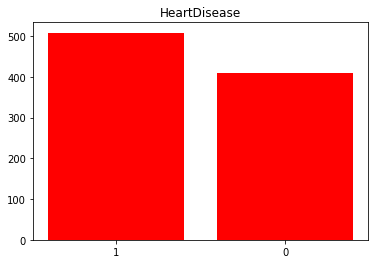

In [ ]:
_, ax = plt.subplots()
number_of_target_occur = data[target_col].value_counts().to_frame()
bar_values = [row[target_col] for _, row in number_of_target_occur.iterrows()]
bar_labels = [index for index, _ in number_of_target_occur.iterrows()]

ax.bar(np.arange(len(bar_labels)), bar_values, tick_label=bar_labels, color='red')
ax.title.set_text(target_col)
plt.show()

Можно говорить о том, что целевые классы сбалансированны в данном датасете.

Построим матрицу корреляции.

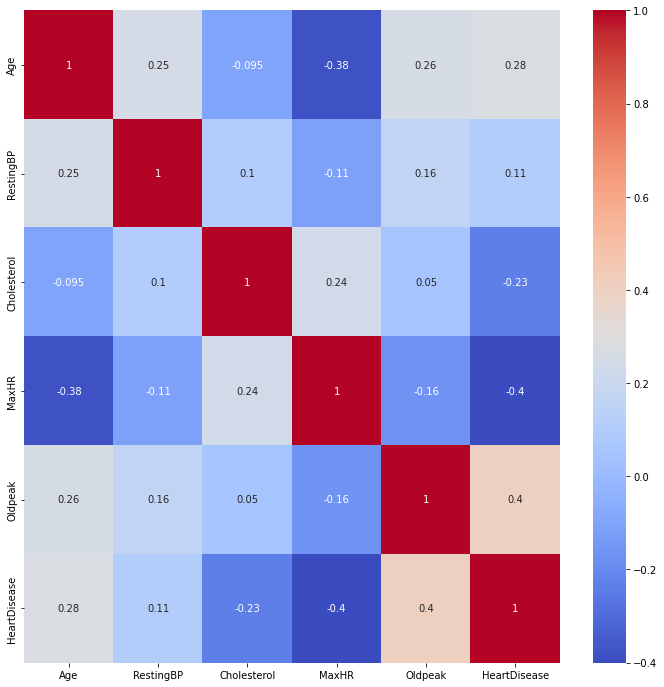

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show()

Можно заметить, что наблюдается некоторая положительная корреляция между целевой переменной и Oldpeak. Также наблюдается отрицательная корреляция между целевой переменной и MaxHR. Еще можно заметить отрицательную корреляцию между Age и MaxHR. Однако значения корреляционной матрицы далеки от +-1, так что заменять группу признаков на какой-то один здесь нельзя.

##Изменение данных

Итого, как нужно изменить датасет для модели, чтобы (возможно) стало лучше:

1) Сделать FastingBS категориальной

2) Все категориальные фичи прогнать через OneHotEncoder.

3) В пайплане для модели можно применить нормализацию числовых признаков, а также как-то уменьшить смещение Cholesterol и Oldpeak.

4) Невалидных данных и NaN'ов в датасете не было.

5) Таргет-признак сбалансирован, тут тоже ничего делать не надо. (хотя в процессе обучения можно поиграться с границей, начиная с которой считать человека больным, чтобы случайно не пропустить больного человека)

6) Каких-то серьезных корреляций также замечено не было, так что уменьшить число признаков тут скорее всего не получится.

Эти изменения данных я буду делать во второй части ЛР.